# PACE L2 for AVUELO: 2/21/25 

In [1]:
# Load Modules
import earthaccess
import xarray as xr
from xarray.backends.api import open_datatree
import matplotlib.pyplot as plt
import cartopy
import numpy as np
import h5netcdf
from IPython.display import JSON
import geopandas as gpd
from shapely.geometry import Point, LineString
import re
import pandas as pd
import seaborn as sns
import cartopy.crs as ccrs
from pace_func import process_l2, subset_xr, target_spectra
import pandas as pd

In [2]:
# Authentification
auth = earthaccess.Auth()
auth.login(strategy="interactive", persist=True)
print('Authenticated:' + str(auth.authenticated))

Enter your Earthdata Login username:  m11keluis
Enter your Earthdata password:  ········


True


## PACE: Level 2 - BGC

In [3]:
# Search Criteria
doi = "2025-02-21"
tspan = (doi, doi)
N = 10 
S = 8
W =-86
E= -84.5
bbox=(W, S, E, N)

In [5]:
# Search for PACE Imagery
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_BGC_NRT",
    temporal=tspan,
    bounding_box=bbox,
)

# Pull from Cloud
results
#bgc_paths = earthaccess.open(results)

[Collection: {'Version': '3.0', 'ShortName': 'PACE_OCI_L2_BGC_NRT'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 15.66204, 'Longitude': -76.92538}, {'Latitude': 10.54858, 'Longitude': -101.18575}, {'Latitude': -12.56949, 'Longitude': -96.29613}, {'Latitude': -7.47068, 'Longitude': -72.22128}, {'Latitude': 15.66204, 'Longitude': -76.92538}]}}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-02-21T18:43:17Z', 'EndingDateTime': '2025-02-21T18:48:16Z'}}
 Size(MB): 21.503551483154297
 Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250221T184317.L2.OC_BGC.V3_0.NRT.nc']]

In [38]:
# Chlorophyll 
dataset = process_l2(paths[1])
array = np.log10(dataset["chlor_a"])
array.attrs.update(
    {
        "units": f'log10({dataset["chlor_a"].attrs["units"]})',
    }
)

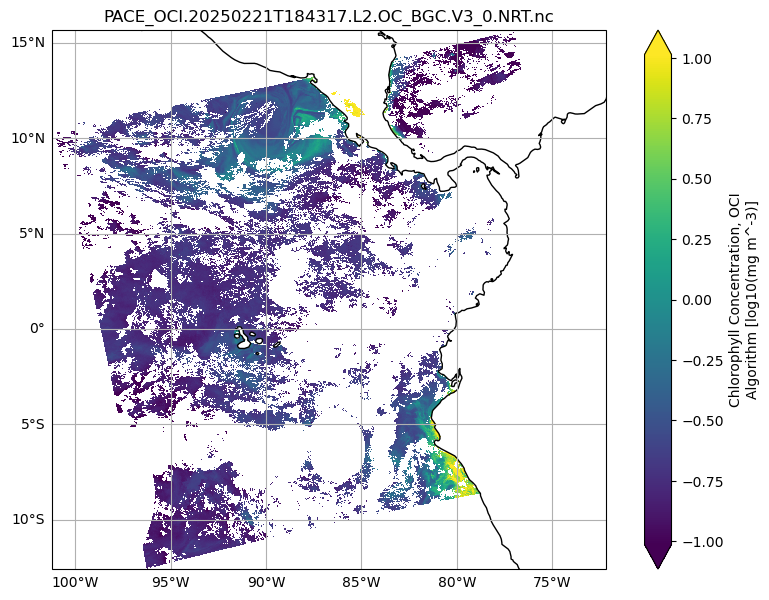

In [39]:
# Full PACE Image
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
array.plot(x="longitude", y="latitude", cmap="viridis", robust=True, ax=ax)
ax.coastlines()
ax.gridlines(draw_labels={"bottom": "x", "left": "y"})
ax.set_title(dataset.attrs["product_name"], loc="center")
fig.savefig('figures/' + dataset.attrs["product_name"] + '_full.png', dpi=600)
plt.show()

In [33]:
# PACE Subset

S = 8
N = 10
W = -86
E = -83

# Chlorophyll Box 
chl_box = np.log(dataset["chlor_a"]).where(
    (
        (dataset["latitude"] > S)
        & (dataset["latitude"] < N)
        & (dataset["longitude"] > W)
        & (dataset["longitude"] < E)
    ),
    drop=True,
)
chl_box.attrs.update(
    {
        "units": f'log10({dataset["chlor_a"].attrs["units"]})',
    }
)

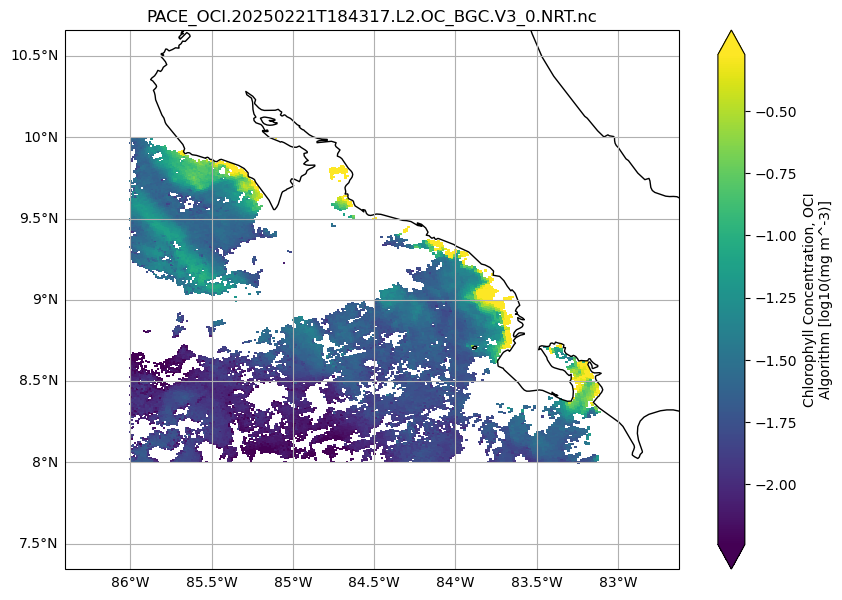

In [34]:
# Plot PACE Chlorophyll and Boat Locations

fig = plt.figure(figsize=(10, 7))
ax.set_extent([-86, -83, 8, 10.0], crs=ccrs.PlateCarree())

ax = plt.axes(projection=cartopy.crs.PlateCarree())
chl_box.plot(x="longitude", y="latitude", cmap="viridis",
             robust=True, ax=ax)
ax.coastlines()
ax.gridlines(draw_labels={"bottom": "x", "left": "y"})
ax.set_title(dataset.attrs["product_name"], loc="center")

fig.savefig('figures/' + dataset.attrs["product_name"] + '.png', dpi=600)